In [13]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.ndimage import convolve1d

from cca.data_util import moving_center, load_sabes_data, calc_autocorr_fns
from cca.cov_util import calc_cross_cov_mats_from_data
from cca import ComplexityComponentsAnalysis

In [2]:
filename = "/Users/davidclark/Projects/ComplexityComponentsAnalysis/data/sabes/indy_20160627_01.mat"
results = load_sabes_data(filename, bin_width_s=0.100)
spikes = results["M1"]
spikes = spikes[:, spikes.sum(axis=0) > 5000]
sqrt_spikes = np.sqrt(spikes)
sqrt_spikes_ctd = moving_center(sqrt_spikes, n=600)
cursor = results["cursor"]



In [27]:
#TODO: compare PI vs dim for reg, reg+deflat., FFT+deflat

opt = ComplexityComponentsAnalysis(init="random")
cross_cov_mats = calc_cross_cov_mats_from_data(sqrt_spikes_ctd, T=40)

opt.cross_covs = cross_cov_mats[:2]
opt.fit_projection(d=1, n_init=10)
V1 = opt.coef_
x1 = np.dot(sqrt_spikes_ctd, V1)

opt.cross_covs = cross_cov_mats[:40]
opt.fit_projection(d=1, n_init=10)
V2 = opt.coef_
x2 = np.dot(sqrt_spikes_ctd, V2)

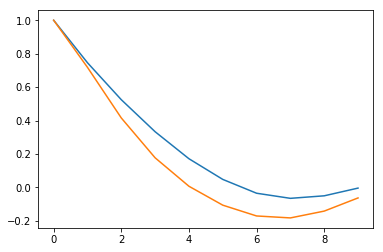

In [37]:
autocorr_fn_1 = calc_autocorr_fns(x1, T=10).flatten()
autocorr_fn_2 = calc_autocorr_fns(x2, T=10).flatten()

autocorr_fn_1 /= autocorr_fn_1[0]
autocorr_fn_2 /= autocorr_fn_2[0]

plt.plot(autocorr_fn_1)
plt.plot(autocorr_fn_2)